In [1]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense,  Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from IPython.display import clear_output
from keras.models import load_model


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_path="/content/drive/MyDrive/MyPicture/data_skin/train"

val_path="/content/drive/MyDrive/MyPicture/data_skin/val"

test_path="/content/drive/MyDrive/MyPicture/data_skin/test"

In [11]:
## tăng cường dữ liệu cho dữ liệu trainning
train_datagen = ImageDataGenerator( rescale=1./255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(train_path,
                                          target_size=(224,224),
                                        #   batch_size=32,
                                          class_mode='categorical')


val = val_datagen.flow_from_directory(val_path,
                                        target_size=(224,224),
                                        # batch_size=32,
                                        # shuffle=True,
                                        class_mode='categorical')

Found 3223 images belonging to 5 classes.
Found 401 images belonging to 5 classes.


In [12]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(224,224, 3)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [13]:
def optimizer_init_fn():
    learning_rate = 1e-4
    return tf.keras.optimizers.Adam(learning_rate)

model.compile(optimizer=optimizer_init_fn(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
class DisplayCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
callbacks = [DisplayCallback(), 
            EarlyStopping(patience=15, verbose=1),
            ReduceLROnPlateau(patience=5, verbose=1),
            ModelCheckpoint('/content/drive/MyDrive/MyPicture/data_skin/model_3.h5',
                            verbose=1, save_best_only=True)]

In [15]:
# Train model
history = model.fit(
    train,
    steps_per_epoch=len(train),

    verbose=1,
    validation_data=val,
    validation_steps=len(val), epochs=50,
    callbacks = callbacks)







Epoch 50: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 50: val_loss did not improve from 0.08771
101/101 [==============================] - 62s 614ms/step - loss: 0.0632 - accuracy: 0.9417 - val_loss: 0.0885 - val_accuracy: 0.9102 - lr: 1.0000e-07
Epoch 50: early stopping


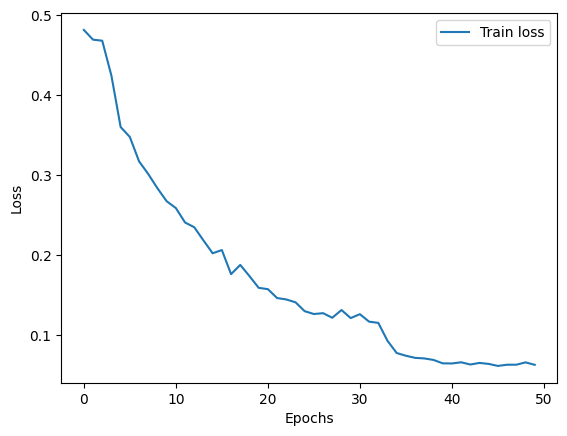

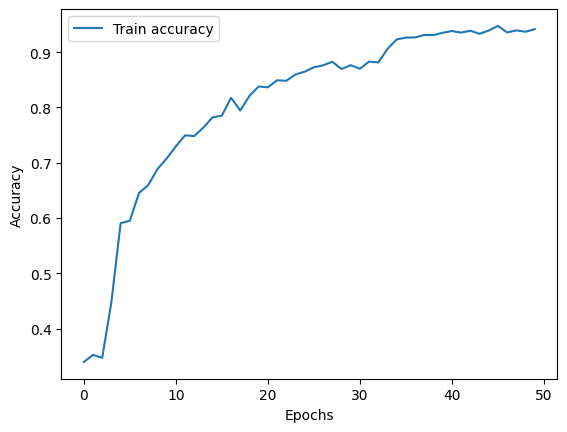

In [16]:


# Plot training loss
plt.plot(history.history["loss"], label="Train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [18]:
model =load_model('/content/drive/MyDrive/MyPicture/data_skin/model_3.h5')

1/1 [==============================] - 1s 1s/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 43ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 33ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 29ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 30ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 28ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 21ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 24ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 21ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 19ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 21ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 19ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 20ms/step
Predicted:  Da

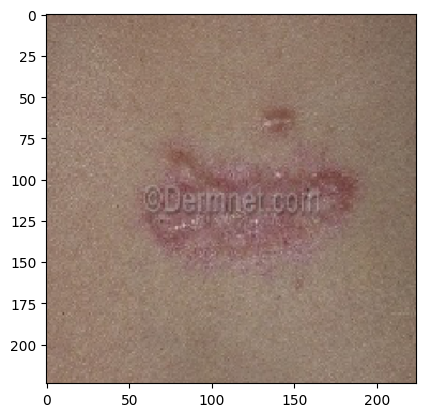

In [19]:
import os
path_folder_basal ='/content/drive/MyDrive/MyPicture/data/test/Daysungtietba'
name_foods=['Daysungtietba', 'not ruoi','ton thuong  mach mau','ung thu bieu mo','ung thu hac to']
for i in os.listdir(path_folder_basal):
  filePath = path_folder_basal +'/'+i
  testImage = load_img(filePath, color_mode = 'rgb', target_size=(224,224))
  arrayImage = img_to_array(testImage).reshape(1,224,224,3)/255
  pred = int(np.argmax(model.predict(arrayImage)))
  print("Predicted: ", name_foods[pred])
  plt.imshow(testImage)

1/1 [==============================] - 0s 29ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 32ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 27ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 29ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 33ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 28ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 22ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 21ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 19ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 20ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 22ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 20ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 23ms/step
Predicted:  not ruoi
1/1 [=========================

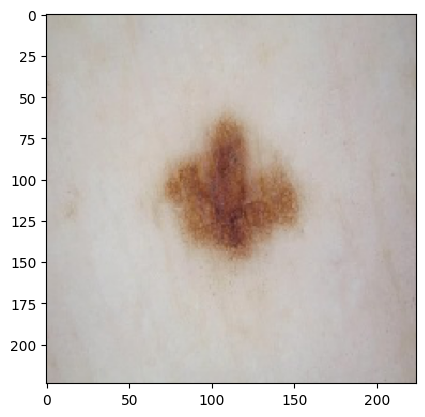

In [21]:
path_folder_cham ='/content/drive/MyDrive/MyPicture/data/test/Not_Ruoi'
name_foods=['Daysungtietba', 'not ruoi','ton thuong  mach mau','ung thu bieu mo','ung thu hac to']
for i in os.listdir(path_folder_cham):
  filePath = path_folder_cham +'/'+i
  testImage = load_img(filePath, color_mode = 'rgb', target_size=(224,224))
  arrayImage = img_to_array(testImage).reshape(1,224,224,3)/255
  pred = int(np.argmax(model.predict(arrayImage)))
  print("Predicted: ", name_foods[pred])
  plt.imshow(testImage)

1/1 [==============================] - 0s 23ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 21ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 25ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 28ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 21ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 19ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 23ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 26ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 23ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 23ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 24ms/step
Predicted:  ton thuong  mach mau
1/1 [==============================] - 0s 21ms/step
Predicted:  ton thuong  mach mau
1/1 

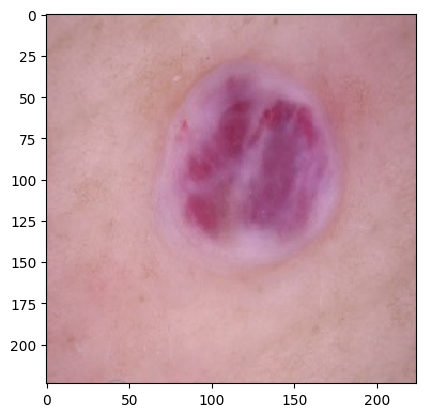

In [22]:
path_folder_cham ='/content/drive/MyDrive/MyPicture/data/test/Ton_Thuong_Mach_Mau'
name_foods=['Daysungtietba', 'not ruoi','ton thuong  mach mau','ung thu bieu mo','ung thu hac to']
for i in os.listdir(path_folder_cham):
  filePath = path_folder_cham +'/'+i
  testImage = load_img(filePath, color_mode = 'rgb', target_size=(224,224))
  arrayImage = img_to_array(testImage).reshape(1,224,224,3)/255
  pred = int(np.argmax(model.predict(arrayImage)))
  print("Predicted: ", name_foods[pred])
  plt.imshow(testImage)

1/1 [==============================] - 0s 79ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 75ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 60ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 28ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 27ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 35ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 27ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 28ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 25ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 20ms/step
Predicted:  not ruoi
1/1 [==============================] - 0s 23ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 21ms/step
Predicted:  Daysungtietba
1/1 [==============================] - 0s 20ms/step
Predi

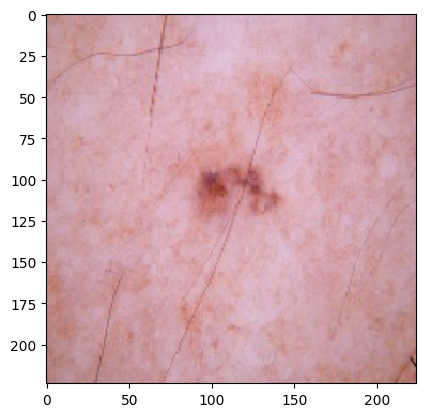

In [23]:
path_folder_cham ='/content/drive/MyDrive/MyPicture/data/test/Ung_Thu_Bieu_Mo_Te_Bao_Day'
name_foods=['Daysungtietba', 'not ruoi','ton thuong  mach mau','ung thu bieu mo','ung thu hac to']
for i in os.listdir(path_folder_cham):
  filePath = path_folder_cham +'/'+i
  testImage = load_img(filePath, color_mode = 'rgb', target_size=(224,224))
  arrayImage = img_to_array(testImage).reshape(1,224,224,3)/255
  pred = int(np.argmax(model.predict(arrayImage)))
  print("Predicted: ", name_foods[pred])
  plt.imshow(testImage)

1/1 [==============================] - 0s 20ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 25ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 29ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 22ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 22ms/step
Predicted:  ung thu bieu mo
1/1 [==============================] - 0s 24ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 23ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 25ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 25ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 21ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 22ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 24ms/step
Predicted:  ung thu hac to
1/1 [==============================] - 0s 22ms/step

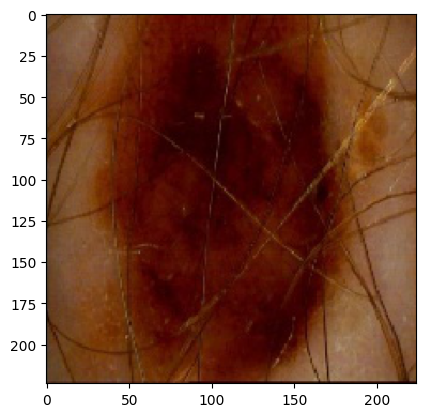

In [24]:
path_folder_cham ='/content/drive/MyDrive/MyPicture/data/test/Ung_Thu_Hac_To'
name_foods=['Daysungtietba', 'not ruoi','ton thuong  mach mau','ung thu bieu mo','ung thu hac to']
for i in os.listdir(path_folder_cham):
  filePath = path_folder_cham +'/'+i
  testImage = load_img(filePath, color_mode = 'rgb', target_size=(224,224))
  arrayImage = img_to_array(testImage).reshape(1,224,224,3)/255
  pred = int(np.argmax(model.predict(arrayImage)))
  print("Predicted: ", name_foods[pred])
  plt.imshow(testImage)